<a href="https://colab.research.google.com/github/Roberto-he/TFM_RHG/blob/main/TFM_FIRE_RHG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OBJETIVO 

Con el bjetivo de este proyecto es buscar los incendios reales que se producen en Londres

El dataset utilizdo ha sido publicado por la la brigada de incendios de londres (LFB)


Las tareas realizadas sobre el data set son:
- Limpiar el dataset y tratar los valores "NaN"
- Buscar datos perdidos
- Balanceo de datos 
- Analizar los datos analiticamente y con graficas
- Buscar un algoritmo para predecir cuando hay un incendio o cuando es una falsa alarma.


#LIBRERIAS

In [6]:
# carga de datos
import pandas as pd
import io
from google.colab import files
# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
import sqlite3
import seaborn as sns
from matplotlib import pyplot


In [5]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


#CARGA DE DATASET DE GRAN TAMANYO EN GOOGLE DRIVE

##CONVERSION DEL DATASET A CSV

In [ ]:
def upload_files ():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
    return df

In [ ]:
def upload_files_xls ():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_excel(io.StringIO(uploaded[fn].decode('utf-8')))
    return df

In [ ]:
df1 = upload_files_xls()
df1.head()

NameError: ignored

In [ ]:
df2 = upload_files_xls()
df2.head()

In [ ]:
df3 = upload_files_xls()
df3.head()

##UNION DE LOS DATASETS

In [ ]:
#Unir las 3 bases de datos
frames = [df1, df2, df3]

df_excel = pd.concat(frames)

In [ ]:
#Pasar a CSV
df_excel.to_csv('LFB incident 2009-2021.csv', index=False)

In [ ]:
#Exportar CSV

from google.colab import files

with open('LFB incident 2009-2021.csv', 'w') as f:
  df.to_csv(f,  index = False)
  

files.download('LFB incident 2009-2021.csv')

df.head()

In [ ]:
df=pd.read_csv("LFB incident 2009-2021.csv")
df

## UNZIP
Al ser un archivo muy pesado lo subo a ggole colab comprimido. Ya en colab lo descomprimo

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

In [ ]:
!unrar x  '/gdrive/My Drive/TFM-Roberto_Hernandez/LFB_incident_2009-2021.rar'  "/gdrive/My Drive/TFM-Roberto_Hernandez/"


#CARGA DATASETS

##DATASET INCENDIOS

In [247]:
#Url: https://data.gov.uk/dataset/e6b9d1c6-7c34-42ca-a100-cd62164ea76c/london-fire-brigade-incident-records
llamadas = pd.read_csv('/gdrive/My Drive/TFM-Roberto_Hernandez/datasets/LFB incident 2009-2021.csv')
llamadas

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,26,28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,UPRN,USRN,Latitude,Longitude,PumpCount,PumpHoursRoundUp,Notional Cost (£)
0,235138081,2009-01-01,2009,00:00:37,0,Special Service,Special Service,RTC,Road Vehicle,Car,In street close to gazetteer location,SW11 4LB,SW11,E09000032,WANDSWORTH,Wandsworth,E05000620,Queenstown,Queenstown,528652.0,176830.0,528650,176850,London,Battersea,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1091,2009-01-01,2009,00:00:46,0,Special Service,Special Service,Assist other agencies,Outdoor,Lake/pond/reservoir,Open land/water - nearest gazetteer location,SE1 7SG,SE1,E09000022,LAMBETH,Lambeth,E05000416,Bishop's,Bishop's,530485.0,179007.0,530450,179050,London,Lambeth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2091,2009-01-01,2009,00:03:00,0,Fire,Secondary Fire,NaN,Outdoor,Road surface/pavement,In street outside gazetteer location,N9 9EL,N9,E09000010,ENFIELD,Enfield,E05000201,Haselbury,Haselbury,533773.0,194492.0,533750,194450,London,Edmonton,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3091,2009-01-01,2009,00:04:27,0,Fire,Secondary Fire,NaN,Outdoor,Domestic garden (vegetation not equipment),On land associated with building,UB10 0DG,UB10,E09000017,HILLINGDON,Hillingdon,E05000332,Hillingdon East,Hillingdon East,507738.0,182805.0,507750,182850,London,Hillingdon,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5091,2009-01-01,2009,00:05:39,0,Fire,Secondary Fire,NaN,Outdoor,Cycle path/public footpath/bridleway,In street outside gazetteer location,N7 8HG,N7,E09000019,ISLINGTON,Islington,E05000375,Holloway,Holloway,531058.0,185307.0,531050,185350,London,Holloway,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333065,050590-30042021,2021-04-30,2021,21:42:23,21,Special Service,Special Service,Lift Release,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Within same building,NaN,NW6,E09000007,CAMDEN,Camden,E05000144,SWISS COTTAGE,SWISS COTTAGE,NaN,NaN,525650,184050,London,West Hampstead,NaN,NaN,NaN,NaN,1.0,1.0,0.000000e+00,20400412.0,NaN,NaN,1.0,1.0,352.0
1333066,050431-30042021,2021-04-30,2021,16:20:38,16,Fire,Secondary Fire,NaN,Outdoor Structure,Small refuse/rubbish container,Correct incident location,SE8 5DD,SE8,E09000023,LEWISHAM,Lewisham,E05000443,EVELYN,EVELYN,536272.0,178387.0,536250,178350,London,Deptford,402.0,Old Kent Road,NaN,NaN,1.0,1.0,1.002533e+10,22004367.0,51.488022,-0.038628,1.0,1.0,352.0
1333067,050653-30042021,2021-04-30,2021,23:53:36,23,Fire,Secondary Fire,NaN,Outdoor Structure,Small refuse/rubbish container,Nearby address - street not listed in gazetteer,E10 7AG,E10,E09000031,WALTHAM FOREST,Waltham Forest,E05000603,LEA BRIDGE,LEA BRIDGE,537667.0,187977.0,537650,187950,London,Leyton,244.0,Leyton,NaN,NaN,1.0,1.0,1.000236e+11,22832450.0,51.573868,-0.014799,1.0,1.0,352.0
1333068,050428-30042021,2021-04-30,2021,16:14:59,16,Fire,Secondary Fire,NaN,Outdoor Structure,Common external bin storage area,In street close to gazetteer location,SE13 7LX,SE13,E09000011,GREENWICH,Greenwich,E05000222,GREENWICH WEST,GREENWICH WEST,537885.0,176420.0,537850,176450,London,Greenwich,452.0,Greenwich,NaN,NaN,1.0,1.0,1.000210e+11,20801074.0,51.469960,-0.016181,1.0,1.0,352.0


In [248]:
#Vemos la aparte de abajo de nuestro dataset
llamadas.tail()


,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,UPRN,USRN,Latitude,Longitude,PumpCount,PumpHoursRoundUp,Notional Cost (£)
1333065,050590-30042021,2021-04-30,2021,21:42:23,21,Special Service,Special Service,Lift Release,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Within same building,NaN,NW6,E09000007,CAMDEN,Camden,E05000144,SWISS COTTAGE,SWISS COTTAGE,NaN,NaN,525650,184050,London,West Hampstead,NaN,NaN,NaN,NaN,1.0,1.0,0.000000e+00,20400412.0,NaN,NaN,1.0,1.0,352.0
1333066,050431-30042021,2021-04-30,2021,16:20:38,16,Fire,Secondary Fire,NaN,Outdoor Structure,Small refuse/rubbish container,Correct incident location,SE8 5DD,SE8,E09000023,LEWISHAM,Lewisham,E05000443,EVELYN,EVELYN,536272.0,178387.0,536250,178350,London,Deptford,402.0,Old Kent Road,NaN,NaN,1.0,1.0,1.002533e+10,22004367.0,51.488022,-0.038628,1.0,1.0,352.0
1333067,050653-30042021,2021-04-30,2021,23:53:36,23,Fire,Secondary Fire,NaN,Outdoor Structure,Small refuse/rubbish container,Nearby address - street not listed in gazetteer,E10 7AG,E10,E09000031,WALTHAM FOREST,Waltham Forest,E05000603,LEA BRIDGE,LEA BRIDGE,537667.0,187977.0,537650,187950,London,Leyton,244.0,Leyton,NaN,NaN,1.0,1.0,1.000236e+11,22832450.0,51.573868,-0.014799,1.0,1.0,352.0
1333068,050428-30042021,2021-04-30,2021,16:14:59,16,Fire,Secondary Fire,NaN,Outdoor Structure,Common external bin storage area,In street close to gazetteer location,SE13 7LX,SE13,E09000011,GREENWICH,Greenwich,E05000222,GREENWICH WEST,GREENWICH WEST,537885.0,176420.0,537850,176450,London,Greenwich,452.0,Greenwich,NaN,NaN,1.0,1.0,1.000210e+11,20801074.0,51.469960,-0.016181,1.0,1.0,352.0
1333069,050249-30042021,2021-04-30,2021,09:44:37,9,Special Service,Special Service,Animal assistance incidents,Outdoor,Animal harm outdoors,On land associated with building,DA14 5EP,DA14,E09000004,BEXLEY,Bexley,E05011229,ST. MARY'S & ST. JAMES,ST. MARY'S & ST. JAMES,548763.0,172019.0,548750,172050,London,Sidcup,443.0,Bexley,NaN,NaN,1.0,1.0,1.002330e+10,20101032.0,51.427664,0.138471,2.0,1.0,352.0


In [249]:
# tamno del dataset
llamadas.shape

(1333070, 38)

In [250]:
# Informacion asociada al dataset
llamadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1333070 entries, 0 to 1333069
Data columns (total 38 columns):
 #   Column                                  Non-Null Count    Dtype  
---  ------                                  --------------    -----  
 0   IncidentNumber                          1333070 non-null  object 
 1   DateOfCall                              1333070 non-null  object 
 2   CalYear                                 1333070 non-null  int64  
 3   TimeOfCall                              1333070 non-null  object 
 4   HourOfCall                              1333070 non-null  int64  
 5   IncidentGroup                           1333069 non-null  object 
 6   StopCodeDescription                     1333069 non-null  object 
 7   SpecialServiceType                      408181 non-null   object 
 8   PropertyCategory                        1333069 non-null  object 
 9   PropertyType                            1333069 non-null  object 
 10  AddressQualifier              

In [251]:
null_columns=llamadas.columns[llamadas.isnull().any()]
llamadas[null_columns].isnull().sum()

IncidentGroup                                   1
StopCodeDescription                             1
SpecialServiceType                         924889
PropertyCategory                                1
PropertyType                                    1
Postcode_full                              629843
Easting_m                                  629843
Northing_m                                 629843
FirstPumpArriving_AttendanceTime           234730
FirstPumpArriving_DeployedFromStation      234740
SecondPumpArriving_AttendanceTime         1162974
SecondPumpArriving_DeployedFromStation    1162978
NumStationsWithPumpsAttending                7686
NumPumpsAttending                            7686
UPRN                                       889041
USRN                                       889041
Latitude                                  1116267
Longitude                                 1116267
PumpCount                                  891065
PumpHoursRoundUp                           891205


###ANALISIS DE DATOS

In [252]:
def descripcionDatosDataset(datos):
    print("Cantidad de filas:", datos.shape[0])
    print("Cantidad de columnas:", datos.shape[1])
    print('-'*100)
    for columna in datos.columns:
        valoresDescripcion = ''
        tipo = ''
        if datos[columna].dtype == 'float64' or datos[columna].dtype == 'int64':
            tipo = 'numérico'
            valoresDescripcion = datos[columna].agg(['min', 'max', 'mean', 'std', 'median'])
        else:
            tipo = 'nominal' #categórico | string | no-numérico
            valoresDescripcion = {'valoresPresentes' : datos[columna].unique(), 
                                  'cantidadNulos' : datos[columna].isna().sum()}
                                 #'conteoValores' : pd.value_counts(datos[columna])}
        print('Columna: ' + columna)
        print('Tipo de datos: ' + tipo)
        print('Descripción de valores:')
        if tipo == 'numérico':
            print(valoresDescripcion)
        else:
            print('-- Valores presentes (10 primeros): ' + str(valoresDescripcion['valoresPresentes'][:10]))
            pctNulos = (valoresDescripcion['cantidadNulos'] / datos.shape[0]) * 100
            print('-- Cantidad de nulos: ' + str(valoresDescripcion['cantidadNulos']) + ' = ' + "{0:.2f}".format(pctNulos) + '%')
        print('-'*100)

In [253]:
descripcionDatosDataset(llamadas)

Cantidad de filas: 1333070
Cantidad de columnas: 38
----------------------------------------------------------------------------------------------------
Columna: IncidentNumber
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): [235138081 1091 2091 3091 5091 6091 8091 9091 10091 11091]
-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: DateOfCall
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['2009-01-01' '2009-01-02' '2009-01-03' '2009-01-04' '2009-01-05'
 '2009-01-06' '2009-01-07' '2009-01-08' '2009-01-09' '2009-01-10']
-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: CalYear
Tipo de datos: numérico
Descripción de valores:
min       2009.000000
max       2021.000000
mean      2014.398667
std          3.632486
median    2014.000000
Name

###LIMPIEZA

In [254]:
#Borramos los atributos posteriores a la llamda que no aportan nada en nuestro estudio
col_eliminar_llamadas=["IncidentStationGround","FirstPumpArriving_AttendanceTime","FirstPumpArriving_DeployedFromStation","SecondPumpArriving_AttendanceTime","SecondPumpArriving_DeployedFromStation","NumStationsWithPumpsAttending","NumPumpsAttending","PumpHoursRoundUp","PumpCount","Notional Cost (£)"]
llamadas.drop(col_eliminar_llamadas, inplace=True, axis=1)
llamadas

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,FRS,UPRN,USRN,Latitude,Longitude
0,235138081,2009-01-01,2009,00:00:37,0,Special Service,Special Service,RTC,Road Vehicle,Car,In street close to gazetteer location,SW11 4LB,SW11,E09000032,WANDSWORTH,Wandsworth,E05000620,Queenstown,Queenstown,528652.0,176830.0,528650,176850,London,NaN,NaN,NaN,NaN
1,1091,2009-01-01,2009,00:00:46,0,Special Service,Special Service,Assist other agencies,Outdoor,Lake/pond/reservoir,Open land/water - nearest gazetteer location,SE1 7SG,SE1,E09000022,LAMBETH,Lambeth,E05000416,Bishop's,Bishop's,530485.0,179007.0,530450,179050,London,NaN,NaN,NaN,NaN
2,2091,2009-01-01,2009,00:03:00,0,Fire,Secondary Fire,NaN,Outdoor,Road surface/pavement,In street outside gazetteer location,N9 9EL,N9,E09000010,ENFIELD,Enfield,E05000201,Haselbury,Haselbury,533773.0,194492.0,533750,194450,London,NaN,NaN,NaN,NaN
3,3091,2009-01-01,2009,00:04:27,0,Fire,Secondary Fire,NaN,Outdoor,Domestic garden (vegetation not equipment),On land associated with building,UB10 0DG,UB10,E09000017,HILLINGDON,Hillingdon,E05000332,Hillingdon East,Hillingdon East,507738.0,182805.0,507750,182850,London,NaN,NaN,NaN,NaN
4,5091,2009-01-01,2009,00:05:39,0,Fire,Secondary Fire,NaN,Outdoor,Cycle path/public footpath/bridleway,In street outside gazetteer location,N7 8HG,N7,E09000019,ISLINGTON,Islington,E05000375,Holloway,Holloway,531058.0,185307.0,531050,185350,London,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333065,050590-30042021,2021-04-30,2021,21:42:23,21,Special Service,Special Service,Lift Release,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Within same building,NaN,NW6,E09000007,CAMDEN,Camden,E05000144,SWISS COTTAGE,SWISS COTTAGE,NaN,NaN,525650,184050,London,0.000000e+00,20400412.0,NaN,NaN
1333066,050431-30042021,2021-04-30,2021,16:20:38,16,Fire,Secondary Fire,NaN,Outdoor Structure,Small refuse/rubbish container,Correct incident location,SE8 5DD,SE8,E09000023,LEWISHAM,Lewisham,E05000443,EVELYN,EVELYN,536272.0,178387.0,536250,178350,London,1.002533e+10,22004367.0,51.488022,-0.038628
1333067,050653-30042021,2021-04-30,2021,23:53:36,23,Fire,Secondary Fire,NaN,Outdoor Structure,Small refuse/rubbish container,Nearby address - street not listed in gazetteer,E10 7AG,E10,E09000031,WALTHAM FOREST,Waltham Forest,E05000603,LEA BRIDGE,LEA BRIDGE,537667.0,187977.0,537650,187950,London,1.000236e+11,22832450.0,51.573868,-0.014799
1333068,050428-30042021,2021-04-30,2021,16:14:59,16,Fire,Secondary Fire,NaN,Outdoor Structure,Common external bin storage area,In street close to gazetteer location,SE13 7LX,SE13,E09000011,GREENWICH,Greenwich,E05000222,GREENWICH WEST,GREENWICH WEST,537885.0,176420.0,537850,176450,London,1.000210e+11,20801074.0,51.469960,-0.016181


In [255]:
#Renombramos las columnas para poder hacer las uniones entre los distintos datasets
llamadas=llamadas.rename(columns={"IncGeo_BoroughCode":"Code", "CalYear":"Year"})
llamadas

,IncidentNumber,DateOfCall,Year,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,Code,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,FRS,UPRN,USRN,Latitude,Longitude
0,235138081,2009-01-01,2009,00:00:37,0,Special Service,Special Service,RTC,Road Vehicle,Car,In street close to gazetteer location,SW11 4LB,SW11,E09000032,WANDSWORTH,Wandsworth,E05000620,Queenstown,Queenstown,528652.0,176830.0,528650,176850,London,NaN,NaN,NaN,NaN
1,1091,2009-01-01,2009,00:00:46,0,Special Service,Special Service,Assist other agencies,Outdoor,Lake/pond/reservoir,Open land/water - nearest gazetteer location,SE1 7SG,SE1,E09000022,LAMBETH,Lambeth,E05000416,Bishop's,Bishop's,530485.0,179007.0,530450,179050,London,NaN,NaN,NaN,NaN
2,2091,2009-01-01,2009,00:03:00,0,Fire,Secondary Fire,NaN,Outdoor,Road surface/pavement,In street outside gazetteer location,N9 9EL,N9,E09000010,ENFIELD,Enfield,E05000201,Haselbury,Haselbury,533773.0,194492.0,533750,194450,London,NaN,NaN,NaN,NaN
3,3091,2009-01-01,2009,00:04:27,0,Fire,Secondary Fire,NaN,Outdoor,Domestic garden (vegetation not equipment),On land associated with building,UB10 0DG,UB10,E09000017,HILLINGDON,Hillingdon,E05000332,Hillingdon East,Hillingdon East,507738.0,182805.0,507750,182850,London,NaN,NaN,NaN,NaN
4,5091,2009-01-01,2009,00:05:39,0,Fire,Secondary Fire,NaN,Outdoor,Cycle path/public footpath/bridleway,In street outside gazetteer location,N7 8HG,N7,E09000019,ISLINGTON,Islington,E05000375,Holloway,Holloway,531058.0,185307.0,531050,185350,London,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333065,050590-30042021,2021-04-30,2021,21:42:23,21,Special Service,Special Service,Lift Release,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Within same building,NaN,NW6,E09000007,CAMDEN,Camden,E05000144,SWISS COTTAGE,SWISS COTTAGE,NaN,NaN,525650,184050,London,0.000000e+00,20400412.0,NaN,NaN
1333066,050431-30042021,2021-04-30,2021,16:20:38,16,Fire,Secondary Fire,NaN,Outdoor Structure,Small refuse/rubbish container,Correct incident location,SE8 5DD,SE8,E09000023,LEWISHAM,Lewisham,E05000443,EVELYN,EVELYN,536272.0,178387.0,536250,178350,London,1.002533e+10,22004367.0,51.488022,-0.038628
1333067,050653-30042021,2021-04-30,2021,23:53:36,23,Fire,Secondary Fire,NaN,Outdoor Structure,Small refuse/rubbish container,Nearby address - street not listed in gazetteer,E10 7AG,E10,E09000031,WALTHAM FOREST,Waltham Forest,E05000603,LEA BRIDGE,LEA BRIDGE,537667.0,187977.0,537650,187950,London,1.000236e+11,22832450.0,51.573868,-0.014799
1333068,050428-30042021,2021-04-30,2021,16:14:59,16,Fire,Secondary Fire,NaN,Outdoor Structure,Common external bin storage area,In street close to gazetteer location,SE13 7LX,SE13,E09000011,GREENWICH,Greenwich,E05000222,GREENWICH WEST,GREENWICH WEST,537885.0,176420.0,537850,176450,London,1.000210e+11,20801074.0,51.469960,-0.016181


In [256]:
llamadas["Code"].unique()

array(['E09000032', 'E09000022', 'E09000010', 'E09000017', 'E09000019',
       'E09000007', 'E09000011', 'E09000018', 'E09000028', 'E09000012',
       'E09000001', 'E09000006', 'E09000024', 'E09000020', 'E09000029',
       'E09000025', 'E09000026', 'E09000030', 'E09000031', 'E09000023',
       'E09000033', 'E09000008', 'E09000027', 'E09000003', 'E09000005',
       'E09000014', 'E09000004', 'E09000002', 'E00000000', 'E09000013',
       'E09000016', 'E09000009', 'E09000021', 'E09000015'], dtype=object)

In [257]:
llamadas["Code_true"]= llamadas["Code"].str.contains('E09', na=False)
llamadas=llamadas.loc[(llamadas["Code_true"]==True)]
llamadas.drop("Code_true", inplace=True, axis=1)
llamadas

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,IncidentNumber,DateOfCall,Year,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,Code,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,FRS,UPRN,USRN,Latitude,Longitude
0,235138081,2009-01-01,2009,00:00:37,0,Special Service,Special Service,RTC,Road Vehicle,Car,In street close to gazetteer location,SW11 4LB,SW11,E09000032,WANDSWORTH,Wandsworth,E05000620,Queenstown,Queenstown,528652.0,176830.0,528650,176850,London,NaN,NaN,NaN,NaN
1,1091,2009-01-01,2009,00:00:46,0,Special Service,Special Service,Assist other agencies,Outdoor,Lake/pond/reservoir,Open land/water - nearest gazetteer location,SE1 7SG,SE1,E09000022,LAMBETH,Lambeth,E05000416,Bishop's,Bishop's,530485.0,179007.0,530450,179050,London,NaN,NaN,NaN,NaN
2,2091,2009-01-01,2009,00:03:00,0,Fire,Secondary Fire,NaN,Outdoor,Road surface/pavement,In street outside gazetteer location,N9 9EL,N9,E09000010,ENFIELD,Enfield,E05000201,Haselbury,Haselbury,533773.0,194492.0,533750,194450,London,NaN,NaN,NaN,NaN
3,3091,2009-01-01,2009,00:04:27,0,Fire,Secondary Fire,NaN,Outdoor,Domestic garden (vegetation not equipment),On land associated with building,UB10 0DG,UB10,E09000017,HILLINGDON,Hillingdon,E05000332,Hillingdon East,Hillingdon East,507738.0,182805.0,507750,182850,London,NaN,NaN,NaN,NaN
4,5091,2009-01-01,2009,00:05:39,0,Fire,Secondary Fire,NaN,Outdoor,Cycle path/public footpath/bridleway,In street outside gazetteer location,N7 8HG,N7,E09000019,ISLINGTON,Islington,E05000375,Holloway,Holloway,531058.0,185307.0,531050,185350,London,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333065,050590-30042021,2021-04-30,2021,21:42:23,21,Special Service,Special Service,Lift Release,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Within same building,NaN,NW6,E09000007,CAMDEN,Camden,E05000144,SWISS COTTAGE,SWISS COTTAGE,NaN,NaN,525650,184050,London,0.000000e+00,20400412.0,NaN,NaN
1333066,050431-30042021,2021-04-30,2021,16:20:38,16,Fire,Secondary Fire,NaN,Outdoor Structure,Small refuse/rubbish container,Correct incident location,SE8 5DD,SE8,E09000023,LEWISHAM,Lewisham,E05000443,EVELYN,EVELYN,536272.0,178387.0,536250,178350,London,1.002533e+10,22004367.0,51.488022,-0.038628
1333067,050653-30042021,2021-04-30,2021,23:53:36,23,Fire,Secondary Fire,NaN,Outdoor Structure,Small refuse/rubbish container,Nearby address - street not listed in gazetteer,E10 7AG,E10,E09000031,WALTHAM FOREST,Waltham Forest,E05000603,LEA BRIDGE,LEA BRIDGE,537667.0,187977.0,537650,187950,London,1.000236e+11,22832450.0,51.573868,-0.014799
1333068,050428-30042021,2021-04-30,2021,16:14:59,16,Fire,Secondary Fire,NaN,Outdoor Structure,Common external bin storage area,In street close to gazetteer location,SE13 7LX,SE13,E09000011,GREENWICH,Greenwich,E05000222,GREENWICH WEST,GREENWICH WEST,537885.0,176420.0,537850,176450,London,1.000210e+11,20801074.0,51.469960,-0.016181


In [258]:
llamadas=llamadas.loc[(llamadas["Code"]!="E09000001")]

In [259]:
llamadas= llamadas.loc[(llamadas["Year"]>=2009)&(llamadas["Year"]<=2015)]

In [260]:
#llamadas.loc[(llamadas["Code"]=="E09000033")]

## DATASET PRECIO VIVIENDA POR GANACIAS


In [261]:
viviendas = pd.read_excel('/gdrive/My Drive/TFM-Roberto_Hernandez/datasets/ratio-house-price-earnings-residence-based.xlsx')
viviendas.head()


,New Code,Old Code,Area,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E09000001,00AA,City of London,6.29,:,:,:,:,:,:,9.52,:,8.66,:,:,:,:,14.83,:,16.55,:,:
2,E09000002,00AB,Barking and Dagenham,4.68,6.26,7.18,7.15,6.55,7.05,7.46,5.71,6.3,6.56,6.38,6.28,7.54,8.24,9.89,10,10.40,10.75,9.63
3,E09000003,00AC,Barnet,7.42,8.49,8.64,8.46,9.12,9.83,9.16,8.47,9.7,10.06,10.05,10.16,12.14,13.3,14.05,13.7,14.45,14.19,15.93
4,E09000004,00AD,Bexley,5.56,6.29,6.57,6.73,6.79,7.19,6.97,6.29,6.72,6.77,6.53,6.68,7.69,8.47,9.44,10.01,10.04,9.61,9.28


###ANALISIS DE DATOS

In [323]:
#descripcionDatosDataset(viviendas)

###LIMPIEZA

In [263]:
viviendas["Code_true"]= viviendas["New Code"].str.contains('E09', na=False)
viviendas=viviendas.loc[(viviendas["Code_true"]==True)]
viviendas.drop("Code_true", inplace=True, axis=1)
viviendas

,New Code,Old Code,Area,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,E09000001,00AA,City of London,6.29,:,:,:,:,:,:,9.52,:,8.66,:,:,:,:,14.83,:,16.55,:,:
2,E09000002,00AB,Barking and Dagenham,4.68,6.26,7.18,7.15,6.55,7.05,7.46,5.71,6.3,6.56,6.38,6.28,7.54,8.24,9.89,10,10.40,10.75,9.63
3,E09000003,00AC,Barnet,7.42,8.49,8.64,8.46,9.12,9.83,9.16,8.47,9.7,10.06,10.05,10.16,12.14,13.3,14.05,13.7,14.45,14.19,15.93
4,E09000004,00AD,Bexley,5.56,6.29,6.57,6.73,6.79,7.19,6.97,6.29,6.72,6.77,6.53,6.68,7.69,8.47,9.44,10.01,10.04,9.61,9.28
5,E09000005,00AE,Brent,8.10,9.32,9.24,9.59,9.85,10.8,9.89,9.75,10.31,11.19,11.13,12.13,12.38,13.43,15.21,15.65,16.32,15.59,14.49
6,E09000006,00AF,Bromley,6.48,7.13,7.54,7.45,7.54,7.71,7.49,6.99,7.82,8.06,7.64,7.94,8.92,9.93,10.86,10.83,11.00,10.73,10.55
7,E09000007,00AG,Camden,9.71,9.24,10.4,10.29,10.38,11.4,11.97,11.15,12.63,13.96,13.3,15.15,17.43,17.13,18.53,19.4,18.23,18.27,18.81
8,E09000008,00AH,Croydon,5.82,6.6,7.23,7.33,7.38,7.96,7.82,6.80,7.17,7.27,7.41,7.54,7.82,8.98,10.18,10.73,10.46,10.97,10.41
9,E09000009,00AJ,Ealing,7.09,8.47,8.68,8.96,8.88,9.22,9.66,8.07,9.61,9.42,9.94,10.93,12.28,14.34,14.73,14.88,14.16,14.79,13.2
10,E09000010,00AK,Enfield,6.03,7.38,7.31,7.83,7.75,8.17,8.44,7.76,8,8.26,8.26,8.43,9.16,10.35,12.16,13,12.94,12.34,12.51


###TRANSFORMACION

Realizamos las transformaciones necesarias para poder unirlo

In [264]:
#Transformacion de dataset para poder unirlo al principal
viv=pd.DataFrame(columns = ['Code', 'Ingreso_Vivienda', "Year"])
viviendas_tr=pd.DataFrame(columns = ['Code', 'Ingreso_Vivienda',"Year"])
for i in range(1,33):
  viv["Ingreso_Vivienda"]=viviendas.iloc[i,3:22]
  viv["Code"]=viviendas.iloc[i,0]
  viv["Year"]=viviendas.columns[3:22]
  viviendas_tr=pd.concat([viviendas_tr,viv])
viviendas_tr

,Code,Ingreso_Vivienda,Year
2002,E09000002,4.68,2002
2003,E09000002,6.26,2003
2004,E09000002,7.18,2004
2005,E09000002,7.15,2005
2006,E09000002,6.55,2006
...,...,...,...
2016,E09000033,23.48,2016
2017,E09000033,24.36,2017
2018,E09000033,23.66,2018
2019,E09000033,21.6,2019


In [265]:
viviendas_tr= viviendas_tr.loc[(viviendas_tr["Year"]>=2009)&(viviendas_tr["Year"]<=2015)]

###VISUALIZACION

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


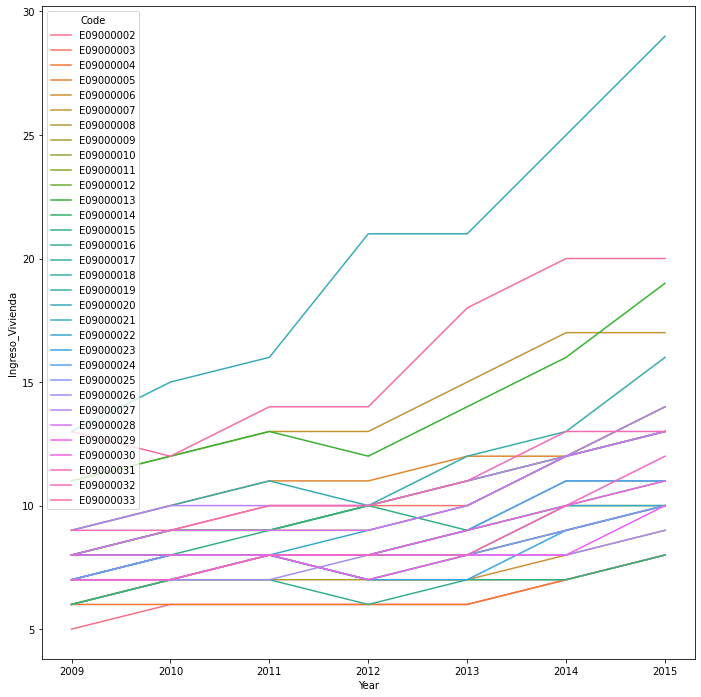

In [266]:

viviendas_tr["Ingreso_Vivienda"]=viviendas_tr["Ingreso_Vivienda"].astype(int)
a4_dims = (11.7, 12)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=viviendas_tr, x="Year", y="Ingreso_Vivienda", hue="Code",ax=ax)

In [267]:
columns

Index(['Code'], dtype='object')

##DATASET DENSIDAD POBLACION

In [268]:
densidad = pd.read_csv('/gdrive/My Drive/TFM-Roberto_Hernandez/datasets/housing-density-borough.csv')
densidad

,Code,Name,Year,Source,Population,Inland_Area _Hectares,Total_Area_Hectares,Population_per_hectare,Square_Kilometres,Population_per_square_kilometre
0,E09000001,City of London,1999,ONS MYE,6581,290.4,314.9,22.7,2.9,2266.2
1,E09000001,City of London,2000,ONS MYE,7014,290.4,314.9,24.2,2.9,2415.3
2,E09000001,City of London,2001,ONS MYE,7359,290.4,314.9,25.3,2.9,2534.1
3,E09000001,City of London,2002,ONS MYE,7280,290.4,314.9,25.1,2.9,2506.9
4,E09000001,City of London,2003,ONS MYE,7115,290.4,314.9,24.5,2.9,2450.1
...,...,...,...,...,...,...,...,...,...,...
1867,E13000002,Outer London,2046,GLA Population Projections,6573194,125423.6,126675.6,52.4,1254.2,5240.8
1868,E13000002,Outer London,2047,GLA Population Projections,6598789,125423.6,126675.6,52.6,1254.2,5261.2
1869,E13000002,Outer London,2048,GLA Population Projections,6622921,125423.6,126675.6,52.8,1254.2,5280.4
1870,E13000002,Outer London,2049,GLA Population Projections,6647527,125423.6,126675.6,53.0,1254.2,5300.1


###ANALISIS DE DATOS

In [269]:
descripcionDatosDataset(densidad)

Cantidad de filas: 1872
Cantidad de columnas: 10
----------------------------------------------------------------------------------------------------
Columna: Code
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['E09000001' 'E09000002' 'E09000003' 'E09000004' 'E09000005' 'E09000006'
 'E09000007' 'E09000008' 'E09000009' 'E09000010']
-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: Name
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['City of London' 'Barking and Dagenham' 'Barnet' 'Bexley' 'Brent'
 'Bromley' 'Camden' 'Croydon' 'Ealing' 'Enfield']
-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: Year
Tipo de datos: numérico
Descripción de valores:
min       1999.000000
max       2050.000000
mean      2024.500000
std         15.012341


###LIMPIEZA

In [270]:
col_eliminar_densidad=["Name","Source","Inland_Area _Hectares", "Total_Area_Hectares", "Population_per_hectare", "Population_per_square_kilometre"]
densidad.drop(col_eliminar_densidad, inplace=True, axis=1)
densidad

,Code,Year,Population,Square_Kilometres
0,E09000001,1999,6581,2.9
1,E09000001,2000,7014,2.9
2,E09000001,2001,7359,2.9
3,E09000001,2002,7280,2.9
4,E09000001,2003,7115,2.9
...,...,...,...,...
1867,E13000002,2046,6573194,1254.2
1868,E13000002,2047,6598789,1254.2
1869,E13000002,2048,6622921,1254.2
1870,E13000002,2049,6647527,1254.2


In [271]:
#Renombramos las columnas para poder hacer las uniones entre los distintos datasets
densidad=densidad.rename(columns={"Population":"Poblacion", "Square_Kilometres":"Area_m2"})
densidad

,Code,Year,Poblacion,Area_m2
0,E09000001,1999,6581,2.9
1,E09000001,2000,7014,2.9
2,E09000001,2001,7359,2.9
3,E09000001,2002,7280,2.9
4,E09000001,2003,7115,2.9
...,...,...,...,...
1867,E13000002,2046,6573194,1254.2
1868,E13000002,2047,6598789,1254.2
1869,E13000002,2048,6622921,1254.2
1870,E13000002,2049,6647527,1254.2


In [272]:
#Atributo code
densidad["Code"].unique()   

array(['E09000001', 'E09000002', 'E09000003', 'E09000004', 'E09000005',
       'E09000006', 'E09000007', 'E09000008', 'E09000009', 'E09000010',
       'E09000011', 'E09000012', 'E09000013', 'E09000014', 'E09000015',
       'E09000016', 'E09000017', 'E09000018', 'E09000019', 'E09000020',
       'E09000021', 'E09000022', 'E09000023', 'E09000024', 'E09000025',
       'E09000026', 'E09000027', 'E09000028', 'E09000029', 'E09000030',
       'E09000031', 'E09000032', 'E09000033', 'E12000007', 'E13000001',
       'E13000002'], dtype=object)

In [273]:
densidad["Code_true"]= densidad["Code"].str.contains('E09', na=False)
densidad=densidad.loc[(densidad["Code_true"]==True)]
densidad.drop("Code_true", inplace=True, axis=1)
densidad["Code"].unique() 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


array(['E09000001', 'E09000002', 'E09000003', 'E09000004', 'E09000005',
       'E09000006', 'E09000007', 'E09000008', 'E09000009', 'E09000010',
       'E09000011', 'E09000012', 'E09000013', 'E09000014', 'E09000015',
       'E09000016', 'E09000017', 'E09000018', 'E09000019', 'E09000020',
       'E09000021', 'E09000022', 'E09000023', 'E09000024', 'E09000025',
       'E09000026', 'E09000027', 'E09000028', 'E09000029', 'E09000030',
       'E09000031', 'E09000032', 'E09000033'], dtype=object)

In [274]:
densidad=densidad.loc[(densidad["Code"]!="E09000001")]

In [275]:
densidad["Year"].unique()

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031,
       2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042,
       2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050])

In [276]:
densidad=densidad.loc[(densidad["Year"]<=2015)&(densidad["Year"]>=2009)]


###VISUALIZACION

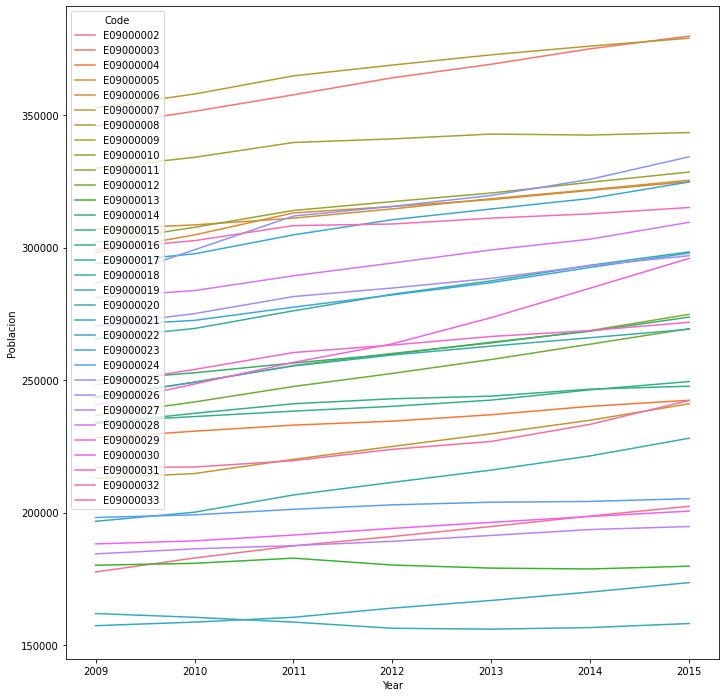

In [277]:
a4_dims = (11.7, 12)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=densidad, x="Year", y="Poblacion", hue="Code",ax=ax)

##DATASET CRIMENES

In [278]:
crimenes = pd.read_csv('/gdrive/My Drive/TFM-Roberto_Hernandez/datasets/crime-rates.csv')
crimenes

,Code,Borough,Year,Offences,Rate,Number_of_offences
0,E09000002,Barking and Dagenham,1999-00,All recorded offences,120.5,"19,567"
1,E09000003,Barnet,1999-00,All recorded offences,98.0,"30,708"
2,E09000004,Bexley,1999-00,All recorded offences,95.1,"20,680"
3,E09000005,Brent,1999-00,All recorded offences,127.7,"33,253"
4,E09000006,Bromley,1999-00,All recorded offences,89.8,"26,474"
...,...,...,...,...,...,...
6655,NaN,Heathrow,2016-17,Other Notifiable Offences,NaN,"1,081"
6656,E13000001,Inner London,2016-17,Other Notifiable Offences,1.7,"6,041"
6657,E13000002,Outer London,2016-17,Other Notifiable Offences,1.3,"6,637"
6658,E12000007,Met Police Area,2016-17,Other Notifiable Offences,1.6,"13,759"


In [279]:
crimenes["Offences"].unique()

array(['All recorded offences', 'Violence Against the Person',
       'Sexual Offences', 'Robbery', 'Burglary', 'Theft and Handling',
       'Fraud or Forgery', 'Criminal Damage', 'Drugs',
       'Other Notifiable Offences'], dtype=object)

###ANALISIS DE DATOS

In [280]:
descripcionDatosDataset(crimenes)

Cantidad de filas: 6660
Cantidad de columnas: 6
----------------------------------------------------------------------------------------------------
Columna: Code
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['E09000002' 'E09000003' 'E09000004' 'E09000005' 'E09000006' 'E09000007'
 'E09000008' 'E09000009' 'E09000010' 'E09000011']
-- Cantidad de nulos: 180 = 2.70%
----------------------------------------------------------------------------------------------------
Columna: Borough
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['Barking and Dagenham' 'Barnet' 'Bexley' 'Brent' 'Bromley' 'Camden'
 'Croydon' 'Ealing' 'Enfield' 'Greenwich']
-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: Year
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['1999-00' '2000-01' '2001-02' '2002-03' '2003-04' '20

###LIMPIEZA

In [281]:
crimenes["Number_of_offences"]=crimenes["Number_of_offences"].str.replace(",","")

In [282]:
col_eliminar_crimenes=["Borough", "Rate"]
crimenes.drop(col_eliminar_crimenes, inplace=True, axis=1)
crimenes

,Code,Year,Offences,Number_of_offences
0,E09000002,1999-00,All recorded offences,19567
1,E09000003,1999-00,All recorded offences,30708
2,E09000004,1999-00,All recorded offences,20680
3,E09000005,1999-00,All recorded offences,33253
4,E09000006,1999-00,All recorded offences,26474
...,...,...,...,...
6655,NaN,2016-17,Other Notifiable Offences,1081
6656,E13000001,2016-17,Other Notifiable Offences,6041
6657,E13000002,2016-17,Other Notifiable Offences,6637
6658,E12000007,2016-17,Other Notifiable Offences,13759


In [283]:
#Creamos un dataset por cada tipo de crimen
#Violencia
crimenes_violence=crimenes.loc[crimenes["Offences"]=="Violence Against the Person"]
crimenes_violence=crimenes_violence.rename(columns={"Number_of_offences": "Crim_Violencia"})
crimenes_violence.drop("Offences", inplace=True, axis=1)

#Sexual
crimenes_sexual=crimenes.loc[crimenes["Offences"]=="Sexual Offences"]
crimenes_sexual=crimenes_sexual.rename(columns={"Number_of_offences": "Crim_Sexual"})
crimenes_sexual.drop("Offences", inplace=True, axis=1)

#Robos
crimenes_robbery=crimenes.loc[crimenes["Offences"]=="Robbery"]
crimenes_robbery=crimenes_robbery.rename(columns={"Number_of_offences": "Crim_Robos"})
crimenes_robbery.drop("Offences", inplace=True, axis=1)

#Robos en casas
crimenes_burglary=crimenes.loc[crimenes["Offences"]=="Burglary"]
crimenes_burglary=crimenes_burglary.rename(columns={"Number_of_offences": "Crim_Robos_casas"})
crimenes_burglary.drop("Offences", inplace=True, axis=1)

#ladrones
crimenes_theft=crimenes.loc[crimenes["Offences"]=="Theft and Handling"]
crimenes_theft=crimenes_theft.rename(columns={"Number_of_offences": "Crim_ladrones"})
crimenes_theft.drop("Offences", inplace=True, axis=1)

#Fraudes
crimenes_fraud=crimenes.loc[crimenes["Offences"]=="Fraud or Forgery"]
crimenes_fraud=crimenes_fraud.rename(columns={"Number_of_offences": "Crim_Frade"})
crimenes_fraud.drop("Offences", inplace=True, axis=1)

#Danyos
crimenes_damage=crimenes.loc[crimenes["Offences"]=="Criminal Damage"]
crimenes_damage=crimenes_damage.rename(columns={"Number_of_offences": "Crim_Danyo"})
crimenes_damage.drop("Offences", inplace=True, axis=1)

#Drogas
crimenes_drugs=crimenes.loc[crimenes["Offences"]=="Drugs"]
crimenes_drugs=crimenes_drugs.rename(columns={"Number_of_offences": "Crim_Drogas"})
crimenes_drugs.drop("Offences", inplace=True, axis=1)

#Otros
crimenes_other=crimenes.loc[crimenes["Offences"]=="Other Notifiable Offences"]
crimenes_other=crimenes_other.rename(columns={"Number_of_offences": "Crim_Otros"})
crimenes_other.drop("Offences", inplace=True, axis=1)


In [284]:
crimenes_other

,Code,Year,Crim_Otros
5994,E09000002,1999-00,167
5995,E09000003,1999-00,273
5996,E09000004,1999-00,184
5997,E09000005,1999-00,354
5998,E09000006,1999-00,214
...,...,...,...
6655,NaN,2016-17,1081
6656,E13000001,2016-17,6041
6657,E13000002,2016-17,6637
6658,E12000007,2016-17,13759


In [285]:
from functools import reduce
dfs = [crimenes_violence,crimenes_sexual,crimenes_robbery, crimenes_burglary,crimenes_theft,crimenes_fraud,crimenes_damage,crimenes_drugs,crimenes_other]
crimenes_total = reduce(lambda left,right: pd.merge(left,right, how="outer"), dfs)
crimenes_total.head(50)

,Code,Year,Crim_Violencia,Crim_Sexual,Crim_Robos,Crim_Robos_casas,Crim_ladrones,Crim_Frade,Crim_Danyo,Crim_Drogas,Crim_Otros
0,E09000002,1999-00,3210,186,514,2563,6624,2193,3666,444,167
1,E09000003,1999-00,4244,244,876,4550,10999,3918,5110,494,273
2,E09000004,1999-00,3151,155,289,2951,7846,1339,4390,375,184
3,E09000005,1999-00,5407,337,2014,4560,10388,4952,4272,969,354
4,E09000006,1999-00,3224,166,518,3652,10866,2026,5283,525,214
5,E09000007,1999-00,5342,295,1645,5192,21873,4827,4557,1677,392
6,E09000008,1999-00,5880,302,1094,4720,13274,4484,7012,676,301
7,E09000009,1999-00,6652,360,1702,4616,13730,3888,6379,1016,394
8,E09000010,1999-00,4040,221,1013,4874,10148,3479,3845,665,303
9,E09000011,1999-00,6234,349,471,3766,11103,1817,5108,845,298


In [286]:
#Cambio el formato de la fercha de los crimenes solo no interesa el anyo
crimenes_total["Year"]=crimenes_total["Year"].map(lambda x: str(x)[:-3])
crimenes_total["Year"]

0      1999
1      1999
2      1999
3      1999
4      1999
       ... 
661    2016
662    2016
663    2016
664    2016
665    2016
Name: Year, Length: 666, dtype: object

In [287]:
#Atributo code
crimenes_total["Code"].unique()   

array(['E09000002', 'E09000003', 'E09000004', 'E09000005', 'E09000006',
       'E09000007', 'E09000008', 'E09000009', 'E09000010', 'E09000011',
       'E09000012', 'E09000013', 'E09000014', 'E09000015', 'E09000016',
       'E09000017', 'E09000018', 'E09000019', 'E09000020', 'E09000021',
       'E09000022', 'E09000023', 'E09000024', 'E09000025', 'E09000026',
       'E09000027', 'E09000028', 'E09000029', 'E09000030', 'E09000031',
       'E09000032', 'E09000033', nan, 'E13000001', 'E13000002',
       'E12000007', '727'], dtype=object)

In [288]:
crimenes_total["Code_true"]= crimenes_total["Code"].str.contains('E09', na=False)
crimenes_total=crimenes_total.loc[(crimenes_total["Code_true"]==True)]
crimenes_total.drop("Code_true", inplace=True, axis=1)
crimenes_total["Code"].unique()   

array(['E09000002', 'E09000003', 'E09000004', 'E09000005', 'E09000006',
       'E09000007', 'E09000008', 'E09000009', 'E09000010', 'E09000011',
       'E09000012', 'E09000013', 'E09000014', 'E09000015', 'E09000016',
       'E09000017', 'E09000018', 'E09000019', 'E09000020', 'E09000021',
       'E09000022', 'E09000023', 'E09000024', 'E09000025', 'E09000026',
       'E09000027', 'E09000028', 'E09000029', 'E09000030', 'E09000031',
       'E09000032', 'E09000033'], dtype=object)

In [289]:
crimenes_total["Year"].unique()   

array(['1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016'], dtype=object)

In [290]:
crimenes_total= crimenes_total.loc[(crimenes_total["Year"]>="2009")&(crimenes_total["Year"]<="2015")]

In [291]:
crimenes_total.loc[(crimenes_total["Code"]=="E09000033")]

,Code,Year,Crim_Violencia,Crim_Sexual,Crim_Robos,Crim_Robos_casas,Crim_ladrones,Crim_Frade,Crim_Danyo,Crim_Drogas,Crim_Otros
401,E09000033,2009,8835,513,1719,3534,38179,2159,3146,5083,854
438,E09000033,2010,8741,540,1935,3322,37349,2245,2844,6170,850
475,E09000033,2011,8287,607,2069,3472,39677,2344,2431,6637,791
512,E09000033,2012,7036,486,2475,4007,38401,2063,2177,4634,735
549,E09000033,2013,7322,595,2357,3963,32441,83,2137,4244,912
586,E09000033,2014,9006,844,1755,3294,27721,75,2039,2682,863
623,E09000033,2015,10251,819,1598,3193,28247,68,2105,2146,777


In [292]:
crimenes_total.loc[(crimenes_total["Code"]=="E09000033")&(crimenes_total["Year"]=="2009")]

,Code,Year,Crim_Violencia,Crim_Sexual,Crim_Robos,Crim_Robos_casas,Crim_ladrones,Crim_Frade,Crim_Danyo,Crim_Drogas,Crim_Otros
401,E09000033,2009,8835,513,1719,3534,38179,2159,3146,5083,854


###VISUALIZACION

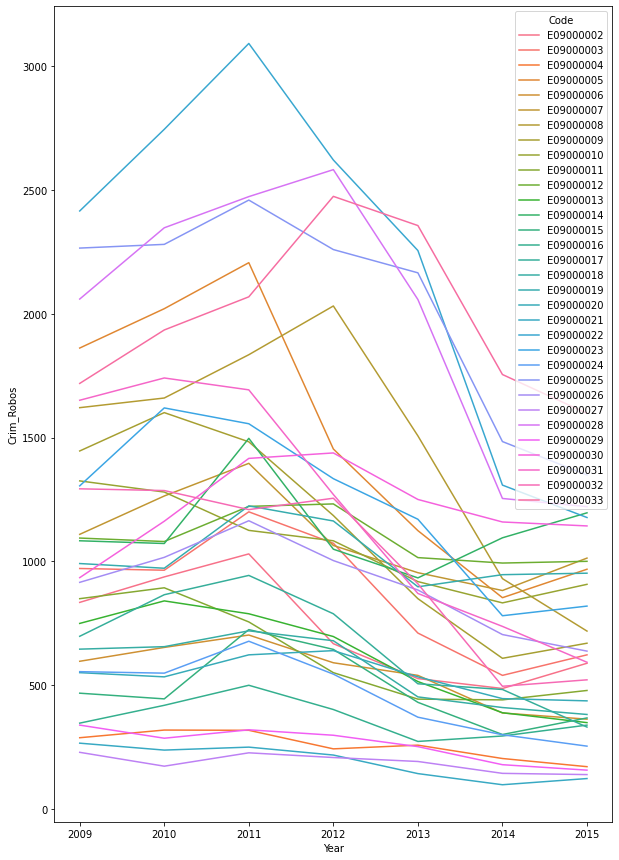

In [293]:
a4_dims = (10, 15)
crimenes_total["Crim_Robos"]=crimenes_total["Crim_Robos"].astype(int)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=crimenes_total, x="Year", y="Crim_Robos", hue="Code",ax=ax)

##DATASET PRECIO VIVIENDA

In [294]:
p_vivienda = pd.read_csv('/gdrive/My Drive/TFM-Roberto_Hernandez/datasets/land-registry-house-prices-borough.csv')
p_vivienda

,Code,Area,Year,Measure,Value
0,E09000001,City of London,Year ending Dec 1995,Median,"105,000"
1,E09000002,Barking and Dagenham,Year ending Dec 1995,Median,"49,000"
2,E09000003,Barnet,Year ending Dec 1995,Median,"85,125"
3,E09000004,Bexley,Year ending Dec 1995,Median,"62,000"
4,E09000005,Brent,Year ending Dec 1995,Median,"68,000"
...,...,...,...,...,...
12010,E12000008,South East,Year ending Dec 2017,Sales,"148,025"
12011,E12000009,South West,Year ending Dec 2017,Sales,"102,292"
12012,E92000001,England,Year ending Dec 2017,Sales,"837,501"
12013,W92000076,Wales,Year ending Dec 2017,Sales,"46,828"


###ANALISIS DE DATOS

In [295]:
descripcionDatosDataset(p_vivienda)

Cantidad de filas: 12015
Cantidad de columnas: 5
----------------------------------------------------------------------------------------------------
Columna: Code
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['E09000001' 'E09000002' 'E09000003' 'E09000004' 'E09000005' 'E09000006'
 'E09000007' 'E09000008' 'E09000009' 'E09000010']
-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: Area
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['City of London' 'Barking and Dagenham' 'Barnet' 'Bexley' 'Brent'
 'Bromley' 'Camden' 'Croydon' 'Ealing' 'Enfield']
-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: Year
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['Year ending Dec 1995' 'Year ending Mar 1996' 'Year 

###LIMPIEZA

In [296]:
#Nos quedamos con las ventas
p_vivienda=p_vivienda.loc[p_vivienda["Measure"]=="Median"]
p_vivienda

,Code,Area,Year,Measure,Value
0,E09000001,City of London,Year ending Dec 1995,Median,"105,000"
1,E09000002,Barking and Dagenham,Year ending Dec 1995,Median,"49,000"
2,E09000003,Barnet,Year ending Dec 1995,Median,"85,125"
3,E09000004,Bexley,Year ending Dec 1995,Median,"62,000"
4,E09000005,Brent,Year ending Dec 1995,Median,"68,000"
...,...,...,...,...,...
4000,E12000008,South East,Year ending Dec 2017,Median,"315,000"
4001,E12000009,South West,Year ending Dec 2017,Median,"242,500"
4002,E92000001,England,Year ending Dec 2017,Median,"234,000"
4003,W92000076,Wales,Year ending Dec 2017,Median,"151,000"


In [297]:
col_eliminar_vivienda=["Area", "Measure"]
p_vivienda.drop(col_eliminar_vivienda, inplace=True, axis=1)
p_vivienda

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Code,Year,Value
0,E09000001,Year ending Dec 1995,"105,000"
1,E09000002,Year ending Dec 1995,"49,000"
2,E09000003,Year ending Dec 1995,"85,125"
3,E09000004,Year ending Dec 1995,"62,000"
4,E09000005,Year ending Dec 1995,"68,000"
...,...,...,...
4000,E12000008,Year ending Dec 2017,"315,000"
4001,E12000009,Year ending Dec 2017,"242,500"
4002,E92000001,Year ending Dec 2017,"234,000"
4003,W92000076,Year ending Dec 2017,"151,000"


In [298]:
p_vivienda["Year"].unique()

array(['Year ending Dec 1995', 'Year ending Mar 1996',
       'Year ending Jun 1996', 'Year ending Sep 1996',
       'Year ending Dec 1996', 'Year ending Mar 1997',
       'Year ending Jun 1997', 'Year ending Sep 1997',
       'Year ending Dec 1997', 'Year ending Mar 1998',
       'Year ending Jun 1998', 'Year ending Sep 1998',
       'Year ending Dec 1998', 'Year ending Mar 1999',
       'Year ending Jun 1999', 'Year ending Sep 1999',
       'Year ending Dec 1999', 'Year ending Mar 2000',
       'Year ending Jun 2000', 'Year ending Sep 2000',
       'Year ending Dec 2000', 'Year ending Mar 2001',
       'Year ending Jun 2001', 'Year ending Sep 2001',
       'Year ending Dec 2001', 'Year ending Mar 2002',
       'Year ending Jun 2002', 'Year ending Sep 2002',
       'Year ending Dec 2002', 'Year ending Mar 2003',
       'Year ending Jun 2003', 'Year ending Sep 2003',
       'Year ending Dec 2003', 'Year ending Mar 2004',
       'Year ending Jun 2004', 'Year ending Sep 2004',
       'Ye

In [299]:
p_vivienda["Year_true"]= p_vivienda["Year"].str.contains('Year ending Dec', na=False)
p_vivienda=p_vivienda.loc[(p_vivienda["Year_true"]==True)]
p_vivienda.drop("Year_true", inplace=True, axis=1)
p_vivienda["Year"].unique() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


array(['Year ending Dec 1995', 'Year ending Dec 1996',
       'Year ending Dec 1997', 'Year ending Dec 1998',
       'Year ending Dec 1999', 'Year ending Dec 2000',
       'Year ending Dec 2001', 'Year ending Dec 2002',
       'Year ending Dec 2003', 'Year ending Dec 2004',
       'Year ending Dec 2005', 'Year ending Dec 2006',
       'Year ending Dec 2007', 'Year ending Dec 2008',
       'Year ending Dec 2009', 'Year ending Dec 2010',
       'Year ending Dec 2011', 'Year ending Dec 2012',
       'Year ending Dec 2013', 'Year ending Dec 2014',
       'Year ending Dec 2015', 'Year ending Dec 2016',
       'Year ending Dec 2017'], dtype=object)

In [300]:
#Transformamos la columna anyo para poder unir el dataset al resto
p_vivienda["Year"]=p_vivienda["Year"].map(lambda x: str(x)[16:])
p_vivienda

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Code,Year,Value
0,E09000001,1995,"105,000"
1,E09000002,1995,"49,000"
2,E09000003,1995,"85,125"
3,E09000004,1995,"62,000"
4,E09000005,1995,"68,000"
...,...,...,...
4000,E12000008,2017,"315,000"
4001,E12000009,2017,"242,500"
4002,E92000001,2017,"234,000"
4003,W92000076,2017,"151,000"


In [301]:
p_vivienda["Value"]=p_vivienda["Value"].str.replace(",","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [302]:
p_vivienda["Code_true"]= p_vivienda["Code"].str.contains('E09', na=False)
p_vivienda=p_vivienda.loc[(p_vivienda["Code_true"]==True)]
p_vivienda.drop("Code_true", inplace=True, axis=1)
p_vivienda["Code"].unique() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


array(['E09000001', 'E09000002', 'E09000003', 'E09000004', 'E09000005',
       'E09000006', 'E09000007', 'E09000008', 'E09000009', 'E09000010',
       'E09000011', 'E09000012', 'E09000013', 'E09000014', 'E09000015',
       'E09000016', 'E09000017', 'E09000018', 'E09000019', 'E09000020',
       'E09000021', 'E09000022', 'E09000023', 'E09000024', 'E09000025',
       'E09000026', 'E09000027', 'E09000028', 'E09000029', 'E09000030',
       'E09000031', 'E09000032', 'E09000033'], dtype=object)

In [303]:
p_vivienda=p_vivienda.loc[(p_vivienda["Code"]!="E09000001")]

In [304]:
p_vivienda=p_vivienda.rename(columns={"Value":"Precio_Vivienda"})

In [305]:
p_vivienda= p_vivienda.loc[(p_vivienda["Year"]>="2009")&(p_vivienda["Year"]<="2015")]

In [306]:
p_vivienda["Year"].unique()

array(['2009', '2010', '2011', '2012', '2013', '2014', '2015'],
      dtype=object)

###VISUALIZACION

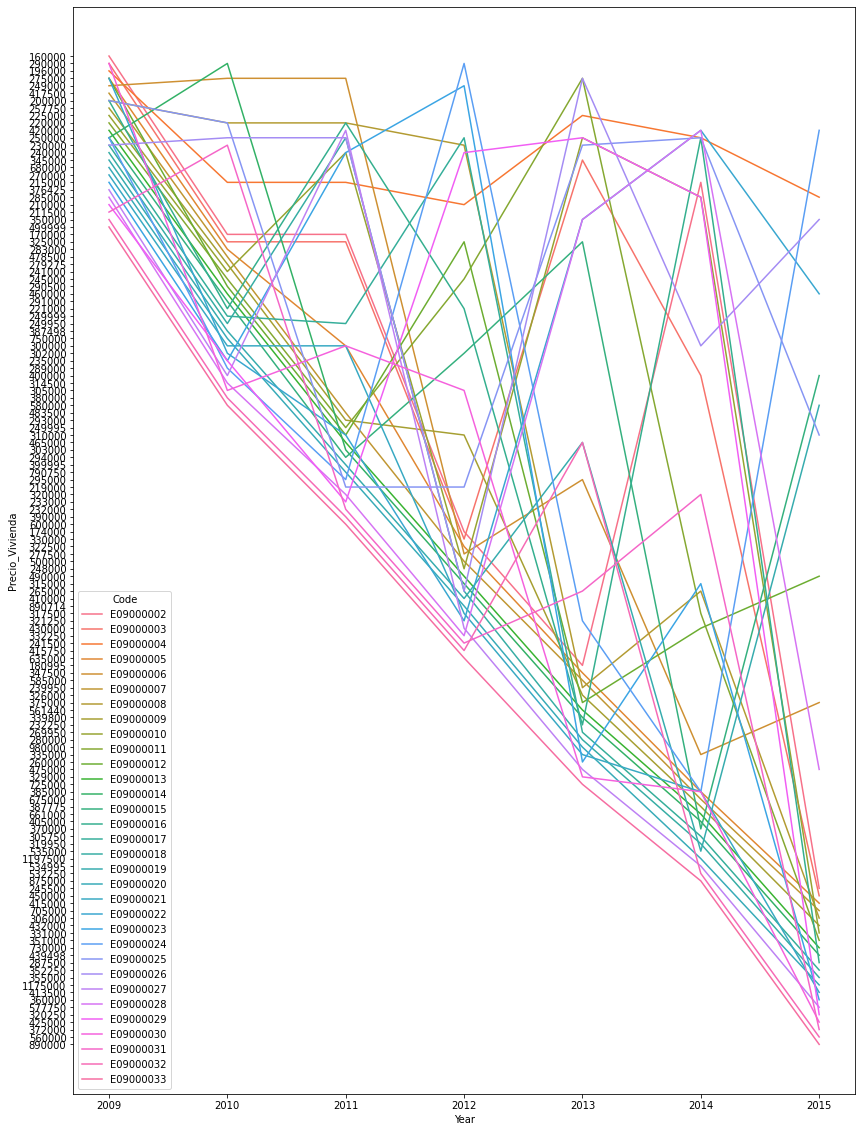

In [307]:
a4_dims = (14, 20)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=p_vivienda, x="Year", y="Precio_Vivienda", hue="Code",ax=ax)

##DATASET CONSUMO ENERGETICO

In [308]:
consumo = pd.read_csv('/gdrive/My Drive/TFM-Roberto_Hernandez/datasets/total-final-energy-consumption.csv')
consumo

,Code,Area,Year,Fuel,Sector,Measurement,Value
0,E09000002,Barking and Dagenham,2005,Coal,Industrial & Commercial,Ktoe,0
1,E09000003,Barnet,2005,Coal,Industrial & Commercial,Ktoe,0
2,E09000004,Bexley,2005,Coal,Industrial & Commercial,Ktoe,0.008194822
3,E09000005,Brent,2005,Coal,Industrial & Commercial,Ktoe,0
4,E09000006,Bromley,2005,Coal,Industrial & Commercial,Ktoe,0.002010728
...,...,...,...,...,...,...,...
23777,N92000002,Northern Ireland,2015,Consuming Sector,Transport,GWh,0
23778,W92000004,Wales,2015,Consuming Sector,Transport,GWh,0
23779,S92000003,Scotland,2015,Consuming Sector,Transport,GWh,0
23780,E92000001,England,2015,Consuming Sector,Transport,GWh,0


###ANALISIS DE DATOS

In [309]:
descripcionDatosDataset(consumo)

Cantidad de filas: 23782
Cantidad de columnas: 7
----------------------------------------------------------------------------------------------------
Columna: Code
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['E09000002' 'E09000003' 'E09000004' 'E09000005' 'E09000006' 'E09000007'
 'E09000001' 'E09000008' 'E09000009' 'E09000010']
-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: Area
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['Barking and Dagenham' 'Barnet' 'Bexley' 'Brent' 'Bromley' 'Camden'
 'City of London' 'Croydon' 'Ealing' 'Enfield']
-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: Year
Tipo de datos: numérico
Descripción de valores:
min       2005.000000
max       2015.000000
mean      2010.000000
std          3.162344


###LIMPIEZA

In [310]:
#Borramos las columnas que no necesitamos
consumo=consumo.loc[consumo["Measurement"]=="GWh"]
col_eliminar_consumo=["Area", "Measurement"]
consumo.drop(col_eliminar_consumo, inplace=True, axis=1)
consumo=consumo.astype("string")
#consumo=consumo(["Code","Year", "Fuel"], dtype="string")
consumo

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Code,Year,Fuel,Sector,Value
11891,E09000002,2005,Coal,Industrial & Commercial,0
11892,E09000003,2005,Coal,Industrial & Commercial,0
11893,E09000004,2005,Coal,Industrial & Commercial,0.095305777
11894,E09000005,2005,Coal,Industrial & Commercial,0
11895,E09000006,2005,Coal,Industrial & Commercial,0.023384762
...,...,...,...,...,...
23777,N92000002,2015,Consuming Sector,Transport,0
23778,W92000004,2015,Consuming Sector,Transport,0
23779,S92000003,2015,Consuming Sector,Transport,0
23780,E92000001,2015,Consuming Sector,Transport,0


In [311]:
consumo=consumo.loc[(consumo["Sector"]=="Total")]

In [312]:
consumo["Code_true"]= consumo["Code"].str.contains('E09', na=False)
consumo=consumo.loc[(consumo["Code_true"]==True)]
consumo.drop("Code_true", inplace=True, axis=1)
consumo["Code"].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<StringArray>
['E09000002', 'E09000003', 'E09000004', 'E09000005', 'E09000006', 'E09000007',
 'E09000001', 'E09000008', 'E09000009', 'E09000010', 'E09000011', 'E09000012',
 'E09000013', 'E09000014', 'E09000015', 'E09000016', 'E09000017', 'E09000018',
 'E09000019', 'E09000020', 'E09000021', 'E09000022', 'E09000023', 'E09000024',
 'E09000025', 'E09000026', 'E09000027', 'E09000028', 'E09000029', 'E09000030',
 'E09000031', 'E09000032', 'E09000033']
Length: 33, dtype: string

In [313]:
consumo=consumo.loc[(consumo["Code"]!="E09000001")]

In [314]:
consumo= consumo.loc[(consumo["Year"]>="2009")&(consumo["Year"]<="2015")]

In [315]:
#Creamos un dataset por cada tipo de energia consumida
consumo_coal=consumo.loc[consumo["Fuel"]=="Coal"]
consumo_coal=consumo_coal.rename(columns={"Value": "Coal"})
consumo_coal.drop("Fuel", inplace=True, axis=1)

consumo_manuf=consumo.loc[consumo["Fuel"]=="Manufactured fuels"]
consumo_manuf=consumo_manuf.rename(columns={"Value": "Manufacturer"})
consumo_manuf.drop("Fuel", inplace=True, axis=1)

consumo_petroleum=consumo.loc[consumo["Fuel"]=="Petroleum products"]
consumo_petroleum=consumo_petroleum.rename(columns={"Value": "Petroleum"})
consumo_petroleum.drop("Fuel", inplace=True, axis=1)

consumo_gas=consumo.loc[consumo["Fuel"]=="Gas"]
consumo_gas=consumo_gas.rename(columns={"Value": "Gas"})
consumo_gas.drop("Fuel", inplace=True, axis=1)

consumo_elect=consumo.loc[consumo["Fuel"]=="Electricity"]
consumo_elect=consumo_elect.rename(columns={"Value": "Electricity"})
consumo_elect.drop("Fuel", inplace=True, axis=1)

consumo_bio=consumo.loc[consumo["Fuel"]=="Bioenergy & wastes"]
consumo_bio=consumo_bio.rename(columns={"Value": "Bionergy"})
consumo_bio.drop("Fuel", inplace=True, axis=1)

###UNION DATASETS

In [316]:
from functools import reduce
dfs = [consumo_coal, consumo_manuf, consumo_petroleum, consumo_gas,consumo_elect,consumo_bio]
consumo_total = reduce(lambda left,right: pd.merge(left,right, how="outer"), dfs)
consumo_total

,Code,Year,Sector,Coal,Manufacturer,Petroleum,Gas,Electricity,Bionergy
0,E09000002,2009,Total,3.309006872,17.63476541,772.5802752,1046.602502,722.240579,22.91062568
1,E09000003,2009,Total,1.611894211,2.032613076,1506.159117,2992.22694,1197.355037,0
2,E09000004,2009,Total,1.747327201,2.484353081,1032.361286,2103.840947,806.668556,26.7132367
3,E09000005,2009,Total,0.938093816,1.096738662,897.38014,2214.778794,1246.328279,0
4,E09000006,2009,Total,3.303843216,3.356673545,1246.183458,2661.590506,1057.328155,1.093800678
...,...,...,...,...,...,...,...,...,...
219,E09000029,2015,Total,2.310309154,2.744301735,538.9943522,0,1240.780327,0
220,E09000030,2015,Total,1.08322651,1.29493069,967.9225501,0,1299.364413,0
221,E09000031,2015,Total,1.635069008,2.180413912,662.0774531,0,1480.79008,0
222,E09000032,2015,Total,0.820423992,1.094060175,808.3665374,0,2098.079984,0


In [317]:
consumo_total.loc[(consumo_total["Code"]=="E09000033")&(consumo_total["Year"]=="2009")]

,Code,Year,Sector,Coal,Manufacturer,Petroleum,Gas,Electricity,Bionergy
31,E09000033,2009,Total,1.430647669,3.77069293,1325.775725,3788.436275,4035.27489,0


In [318]:
consumo_bio.drop("Sector", inplace=True, axis=1)

##DATASET FESTIVOS

In [319]:
festivos = pd.read_excel('/gdrive/My Drive/TFM-Roberto_Hernandez/datasets/Bank-holidays.xlsx')
festivos.head()

,Date,Holiday-Event,Holiday-code
0,1995-01-01,New Year's Day,F
1,1995-01-02,New Year's Day-moved,M
2,1995-04-13,Previous Good Friday,P
3,1995-04-14,Good Friday,F
4,1995-04-17,Easter Monday,F


###ANALISIS DE DATOS

In [320]:
descripcionDatosDataset(festivos)

Cantidad de filas: 141
Cantidad de columnas: 3
----------------------------------------------------------------------------------------------------
Columna: Date
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ['1995-01-01T00:00:00.000000000' '1995-01-02T00:00:00.000000000'
 '1995-04-13T00:00:00.000000000' '1995-04-14T00:00:00.000000000'
 '1995-04-17T00:00:00.000000000' '1995-05-08T00:00:00.000000000'
 '1995-05-29T00:00:00.000000000' '1995-08-28T00:00:00.000000000'
 '1995-05-05T00:00:00.000000000' '1995-12-25T00:00:00.000000000']
-- Cantidad de nulos: 12 = 8.51%
----------------------------------------------------------------------------------------------------
Columna: Holiday-Event
Tipo de datos: nominal
Descripción de valores:
-- Valores presentes (10 primeros): ["New Year's Day" "New Year's Day-moved" 'Previous Good Friday'
 'Good Friday' 'Easter Monday' 'Early May bank holiday'
 'Late May bank holiday' 'August Bank Holidays' 'Guy Fawkes Day'
 'Ch

###LIMPIEZA

In [321]:
#festivos= festivos.loc[(festivos["Year"]>="2009")]

#DATASET UNIDO

Unimos todos los dataset, usaremos el codigo del barrio como referencia y el anyo

###UNION DATASETS

In [ ]:
llamadas.shape


(770670, 29)

In [ ]:
#Unimos los dataset por el codigo y el anyo
llamadas["Year"]=llamadas["Year"].astype("string")
viviendas_tr["Year"]=viviendas_tr["Year"].astype("string")
llamadas["Code"]=llamadas["Code"].astype("string")
viviendas_tr["Code"]=viviendas_tr["Code"].astype("string")
dfs = [llamadas, viviendas_tr]
df = reduce(lambda left,right: pd.merge(left,right, how="outer"), dfs)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,IncidentNumber,DateOfCall,Year,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,Code,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,FRS,UPRN,USRN,Latitude,Longitude,Notional Cost (£),Precio
0,235138081,2009-01-01,2009,00:00:37,0,Special Service,Special Service,RTC,Road Vehicle,Car,In street close to gazetteer location,SW11 4LB,SW11,E09000032,WANDSWORTH,Wandsworth,E05000620,Queenstown,Queenstown,528652.0,176830.0,528650,176850,London,NaN,NaN,NaN,NaN,NaN,9.14
1,155091,2009-01-01,2009,03:40:14,3,False Alarm,AFA,NaN,Dwelling,Self contained Sheltered Housing,Correct incident location,NaN,SW11,E09000032,WANDSWORTH,Wandsworth,E05000622,St. Mary's Park,St. Mary's Park,NaN,NaN,526850,176750,London,NaN,NaN,NaN,NaN,NaN,9.14
2,232091,2009-01-01,2009,06:58:52,6,Fire,Secondary Fire,NaN,Outdoor Structure,Small refuse/rubbish container,In street outside gazetteer location,SW15 4DG,SW15,E09000032,WANDSWORTH,Wandsworth,E05000621,Roehampton and Putney Heath,Roehampton and Putney Heath,522250.0,173750.0,522250,173750,London,NaN,NaN,NaN,NaN,NaN,9.14
3,248091,2009-01-01,2009,07:55:23,7,Special Service,Special Service,Effecting entry/exit,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,NaN,SW11,E09000032,WANDSWORTH,Wandsworth,E05000623,Shaftesbury,Shaftesbury,NaN,NaN,528350,175850,London,NaN,NaN,NaN,NaN,NaN,9.14
4,315091,2009-01-01,2009,10:47:07,10,False Alarm,AFA,NaN,Other Residential,Nursing/Care Home/Hospice,Correct incident location,SW15 2UQ,SW15,E09000032,WANDSWORTH,Wandsworth,E05000613,East Putney,East Putney,524549.0,174454.0,524550,174450,London,NaN,NaN,NaN,NaN,NaN,9.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770665,178570-30122015,2015-12-30,2015,12:47:47,12,Fire,Secondary Fire,NaN,Outdoor Structure,Small refuse/rubbish container,In street outside gazetteer location,RM1 1UP,RM1,E09000016,HAVERING,Havering,E05000319,ROMFORD TOWN,ROMFORD TOWN,551270.0,188720.0,551250,188750,London,NaN,NaN,NaN,NaN,NaN,8.73
770666,178633-30122015,2015-12-30,2015,14:46:25,14,False Alarm,AFA,NaN,Other Residential,Retirement/Old Persons Home,Correct incident location,RM13 9AG,RM13,E09000016,HAVERING,Havering,E05000318,RAINHAM AND WENNINGTON,RAINHAM AND WENNINGTON,552449.0,182436.0,552450,182450,London,NaN,NaN,NaN,NaN,NaN,8.73
770667,178666-30122015,2015-12-30,2015,17:26:31,17,False Alarm,AFA,NaN,Dwelling,House - single occupancy,Correct incident location,NaN,RM12,E09000016,HAVERING,Havering,E05000320,ST. ANDREW'S,ST. ANDREW'S,NaN,NaN,553350,186650,London,NaN,NaN,NaN,NaN,NaN,8.73
770668,178706-30122015,2015-12-30,2015,19:09:58,19,False Alarm,AFA,NaN,Dwelling,House - single occupancy,Correct incident location,NaN,RM12,E09000016,HAVERING,Havering,E05000311,HACTON,HACTON,NaN,NaN,553250,185850,London,NaN,NaN,NaN,NaN,NaN,8.73


In [ ]:
#Unimos los dataset por el codigo y el anyo
densidad["Year"]=densidad["Year"].astype("string")
densidad["Code"]=densidad["Code"].astype("string")
df = pd.merge(df, densidad, how="outer")
df

,IncidentNumber,DateOfCall,Year,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,Code,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,FRS,UPRN,USRN,Latitude,Longitude,Notional Cost (£),Precio,Poblacion,Poblacion_m2
0,235138081,2009-01-01,2009,00:00:37,0,Special Service,Special Service,RTC,Road Vehicle,Car,In street close to gazetteer location,SW11 4LB,SW11,E09000032,WANDSWORTH,Wandsworth,E05000620,Queenstown,Queenstown,528652.0,176830.0,528650,176850,London,NaN,NaN,NaN,NaN,NaN,9.14,299347,8736.4
1,155091,2009-01-01,2009,03:40:14,3,False Alarm,AFA,NaN,Dwelling,Self contained Sheltered Housing,Correct incident location,NaN,SW11,E09000032,WANDSWORTH,Wandsworth,E05000622,St. Mary's Park,St. Mary's Park,NaN,NaN,526850,176750,London,NaN,NaN,NaN,NaN,NaN,9.14,299347,8736.4
2,232091,2009-01-01,2009,06:58:52,6,Fire,Secondary Fire,NaN,Outdoor Structure,Small refuse/rubbish container,In street outside gazetteer location,SW15 4DG,SW15,E09000032,WANDSWORTH,Wandsworth,E05000621,Roehampton and Putney Heath,Roehampton and Putney Heath,522250.0,173750.0,522250,173750,London,NaN,NaN,NaN,NaN,NaN,9.14,299347,8736.4
3,248091,2009-01-01,2009,07:55:23,7,Special Service,Special Service,Effecting entry/exit,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,NaN,SW11,E09000032,WANDSWORTH,Wandsworth,E05000623,Shaftesbury,Shaftesbury,NaN,NaN,528350,175850,London,NaN,NaN,NaN,NaN,NaN,9.14,299347,8736.4
4,315091,2009-01-01,2009,10:47:07,10,False Alarm,AFA,NaN,Other Residential,Nursing/Care Home/Hospice,Correct incident location,SW15 2UQ,SW15,E09000032,WANDSWORTH,Wandsworth,E05000613,East Putney,East Putney,524549.0,174454.0,524550,174450,London,NaN,NaN,NaN,NaN,NaN,9.14,299347,8736.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770665,178570-30122015,2015-12-30,2015,12:47:47,12,Fire,Secondary Fire,NaN,Outdoor Structure,Small refuse/rubbish container,In street outside gazetteer location,RM1 1UP,RM1,E09000016,HAVERING,Havering,E05000319,ROMFORD TOWN,ROMFORD TOWN,551270.0,188720.0,551250,188750,London,NaN,NaN,NaN,NaN,NaN,8.73,249439,2220.2
770666,178633-30122015,2015-12-30,2015,14:46:25,14,False Alarm,AFA,NaN,Other Residential,Retirement/Old Persons Home,Correct incident location,RM13 9AG,RM13,E09000016,HAVERING,Havering,E05000318,RAINHAM AND WENNINGTON,RAINHAM AND WENNINGTON,552449.0,182436.0,552450,182450,London,NaN,NaN,NaN,NaN,NaN,8.73,249439,2220.2
770667,178666-30122015,2015-12-30,2015,17:26:31,17,False Alarm,AFA,NaN,Dwelling,House - single occupancy,Correct incident location,NaN,RM12,E09000016,HAVERING,Havering,E05000320,ST. ANDREW'S,ST. ANDREW'S,NaN,NaN,553350,186650,London,NaN,NaN,NaN,NaN,NaN,8.73,249439,2220.2
770668,178706-30122015,2015-12-30,2015,19:09:58,19,False Alarm,AFA,NaN,Dwelling,House - single occupancy,Correct incident location,NaN,RM12,E09000016,HAVERING,Havering,E05000311,HACTON,HACTON,NaN,NaN,553250,185850,London,NaN,NaN,NaN,NaN,NaN,8.73,249439,2220.2


In [ ]:
#Unimos los dataset por el codigo y el anyo
crimenes_total["Year"]=crimenes_total["Year"].astype("string")
crimenes_total["Code"]=crimenes_total["Code"].astype("string")
df = pd.merge(df,crimenes_total, how="outer")
df

,IncidentNumber,DateOfCall,Year,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,Code,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,FRS,UPRN,USRN,Latitude,Longitude,Notional Cost (£),Precio,Poblacion,Poblacion_m2,Crim_Violencia,Crim_Sexual,Crim_Robos,Crim_Robos_casas,Crim_ladrones,Crim_Frade,Crim_Danyo,Crim_Drogas,Crim_Otros
0,235138081,2009-01-01,2009,00:00:37,0,Special Service,Special Service,RTC,Road Vehicle,Car,In street close to gazetteer location,SW11 4LB,SW11,E09000032,WANDSWORTH,Wandsworth,E05000620,Queenstown,Queenstown,528652.0,176830.0,528650,176850,London,NaN,NaN,NaN,NaN,NaN,9.14,299347,8736.4,"5,240",336,"1,293","2,966","9,862",926,"2,781","1,721",344
1,155091,2009-01-01,2009,03:40:14,3,False Alarm,AFA,NaN,Dwelling,Self contained Sheltered Housing,Correct incident location,NaN,SW11,E09000032,WANDSWORTH,Wandsworth,E05000622,St. Mary's Park,St. Mary's Park,NaN,NaN,526850,176750,London,NaN,NaN,NaN,NaN,NaN,9.14,299347,8736.4,"5,240",336,"1,293","2,966","9,862",926,"2,781","1,721",344
2,232091,2009-01-01,2009,06:58:52,6,Fire,Secondary Fire,NaN,Outdoor Structure,Small refuse/rubbish container,In street outside gazetteer location,SW15 4DG,SW15,E09000032,WANDSWORTH,Wandsworth,E05000621,Roehampton and Putney Heath,Roehampton and Putney Heath,522250.0,173750.0,522250,173750,London,NaN,NaN,NaN,NaN,NaN,9.14,299347,8736.4,"5,240",336,"1,293","2,966","9,862",926,"2,781","1,721",344
3,248091,2009-01-01,2009,07:55:23,7,Special Service,Special Service,Effecting entry/exit,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,NaN,SW11,E09000032,WANDSWORTH,Wandsworth,E05000623,Shaftesbury,Shaftesbury,NaN,NaN,528350,175850,London,NaN,NaN,NaN,NaN,NaN,9.14,299347,8736.4,"5,240",336,"1,293","2,966","9,862",926,"2,781","1,721",344
4,315091,2009-01-01,2009,10:47:07,10,False Alarm,AFA,NaN,Other Residential,Nursing/Care Home/Hospice,Correct incident location,SW15 2UQ,SW15,E09000032,WANDSWORTH,Wandsworth,E05000613,East Putney,East Putney,524549.0,174454.0,524550,174450,London,NaN,NaN,NaN,NaN,NaN,9.14,299347,8736.4,"5,240",336,"1,293","2,966","9,862",926,"2,781","1,721",344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770665,178570-30122015,2015-12-30,2015,12:47:47,12,Fire,Secondary Fire,NaN,Outdoor Structure,Small refuse/rubbish container,In street outside gazetteer location,RM1 1UP,RM1,E09000016,HAVERING,Havering,E05000319,ROMFORD TOWN,ROMFORD TOWN,551270.0,188720.0,551250,188750,London,NaN,NaN,NaN,NaN,NaN,8.73,249439,2220.2,"5,425",370,338,"1,844","6,000",22,"1,702",766,384
770666,178633-30122015,2015-12-30,2015,14:46:25,14,False Alarm,AFA,NaN,Other Residential,Retirement/Old Persons Home,Correct incident location,RM13 9AG,RM13,E09000016,HAVERING,Havering,E05000318,RAINHAM AND WENNINGTON,RAINHAM AND WENNINGTON,552449.0,182436.0,552450,182450,London,NaN,NaN,NaN,NaN,NaN,8.73,249439,2220.2,"5,425",370,338,"1,844","6,000",22,"1,702",766,384
770667,178666-30122015,2015-12-30,2015,17:26:31,17,False Alarm,AFA,NaN,Dwelling,House - single occupancy,Correct incident location,NaN,RM12,E09000016,HAVERING,Havering,E05000320,ST. ANDREW'S,ST. ANDREW'S,NaN,NaN,553350,186650,London,NaN,NaN,NaN,NaN,NaN,8.73,249439,2220.2,"5,425",370,338,"1,844","6,000",22,"1,702",766,384
770668,178706-30122015,2015-12-30,2015,19:09:58,19,False Alarm,AFA,NaN,Dwelling,House - single occupancy,Correct incident location,NaN,RM12,E09000016,HAVERING,Havering,E05000311,HACTON,HACTON,NaN,NaN,553250,185850,London,NaN,NaN,NaN,NaN,NaN,8.73,249439,2220.2,"5,425",370,338,"1,844","6,000",22,"1,702",766,384


In [ ]:
#Unimos los dataset por el codigo y el anyo
p_vivienda["Year"]=p_vivienda["Year"].astype("string")
p_vivienda["Code"]=p_vivienda["Code"].astype("string")
df = pd.merge(df,p_vivienda, how="outer")
df

,IncidentNumber,DateOfCall,Year,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,Code,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,FRS,UPRN,USRN,Latitude,Longitude,Notional Cost (£),Precio,Poblacion,Poblacion_m2,Precio_Vivienda
0,235138081,2009-01-01,2009,00:00:37,0,Special Service,Special Service,RTC,Road Vehicle,Car,In street close to gazetteer location,SW11 4LB,SW11,E09000032,WANDSWORTH,Wandsworth,E05000620,Queenstown,Queenstown,528652.0,176830.0,528650,176850,London,NaN,NaN,NaN,NaN,NaN,9.14,299347,8736.4,"4,424"
1,155091,2009-01-01,2009,03:40:14,3,False Alarm,AFA,NaN,Dwelling,Self contained Sheltered Housing,Correct incident location,NaN,SW11,E09000032,WANDSWORTH,Wandsworth,E05000622,St. Mary's Park,St. Mary's Park,NaN,NaN,526850,176750,London,NaN,NaN,NaN,NaN,NaN,9.14,299347,8736.4,"4,424"
2,232091,2009-01-01,2009,06:58:52,6,Fire,Secondary Fire,NaN,Outdoor Structure,Small refuse/rubbish container,In street outside gazetteer location,SW15 4DG,SW15,E09000032,WANDSWORTH,Wandsworth,E05000621,Roehampton and Putney Heath,Roehampton and Putney Heath,522250.0,173750.0,522250,173750,London,NaN,NaN,NaN,NaN,NaN,9.14,299347,8736.4,"4,424"
3,248091,2009-01-01,2009,07:55:23,7,Special Service,Special Service,Effecting entry/exit,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,NaN,SW11,E09000032,WANDSWORTH,Wandsworth,E05000623,Shaftesbury,Shaftesbury,NaN,NaN,528350,175850,London,NaN,NaN,NaN,NaN,NaN,9.14,299347,8736.4,"4,424"
4,315091,2009-01-01,2009,10:47:07,10,False Alarm,AFA,NaN,Other Residential,Nursing/Care Home/Hospice,Correct incident location,SW15 2UQ,SW15,E09000032,WANDSWORTH,Wandsworth,E05000613,East Putney,East Putney,524549.0,174454.0,524550,174450,London,NaN,NaN,NaN,NaN,NaN,9.14,299347,8736.4,"4,424"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770665,178570-30122015,2015-12-30,2015,12:47:47,12,Fire,Secondary Fire,NaN,Outdoor Structure,Small refuse/rubbish container,In street outside gazetteer location,RM1 1UP,RM1,E09000016,HAVERING,Havering,E05000319,ROMFORD TOWN,ROMFORD TOWN,551270.0,188720.0,551250,188750,London,NaN,NaN,NaN,NaN,NaN,8.73,249439,2220.2,"4,143"
770666,178633-30122015,2015-12-30,2015,14:46:25,14,False Alarm,AFA,NaN,Other Residential,Retirement/Old Persons Home,Correct incident location,RM13 9AG,RM13,E09000016,HAVERING,Havering,E05000318,RAINHAM AND WENNINGTON,RAINHAM AND WENNINGTON,552449.0,182436.0,552450,182450,London,NaN,NaN,NaN,NaN,NaN,8.73,249439,2220.2,"4,143"
770667,178666-30122015,2015-12-30,2015,17:26:31,17,False Alarm,AFA,NaN,Dwelling,House - single occupancy,Correct incident location,NaN,RM12,E09000016,HAVERING,Havering,E05000320,ST. ANDREW'S,ST. ANDREW'S,NaN,NaN,553350,186650,London,NaN,NaN,NaN,NaN,NaN,8.73,249439,2220.2,"4,143"
770668,178706-30122015,2015-12-30,2015,19:09:58,19,False Alarm,AFA,NaN,Dwelling,House - single occupancy,Correct incident location,NaN,RM12,E09000016,HAVERING,Havering,E05000311,HACTON,HACTON,NaN,NaN,553250,185850,London,NaN,NaN,NaN,NaN,NaN,8.73,249439,2220.2,"4,143"


In [ ]:
#Unimos los dataset por el codigo y el anyo
consumo_total["Year"]=consumo_total["Year"].astype("string")
consumo_total["Code"]=consumo_total["Code"].astype("string")
df = pd.merge(df,consumo_total, how="outer")
df

,IncidentNumber,DateOfCall,Year,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,Code,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,FRS,UPRN,USRN,Latitude,Longitude,Notional Cost (£),Precio,Poblacion,Poblacion_m2,Precio_Vivienda,Sector,Coal,Manufacturer,Petroleum,Gas,Electricity,Bionergy
0,235138081,2009-01-01,2009,00:00:37,0,Special Service,Special Service,RTC,Road Vehicle,Car,In street close to gazetteer location,SW11 4LB,SW11,E09000032,WANDSWORTH,Wandsworth,E05000620,Queenstown,Queenstown,528652.0,176830.0,528650,176850,London,NaN,NaN,NaN,NaN,NaN,9.14,299347,8736.4,"4,424",Total,0.877600274,1.026014813,935.6417534,2362.311686,1003.712814,0
1,155091,2009-01-01,2009,03:40:14,3,False Alarm,AFA,NaN,Dwelling,Self contained Sheltered Housing,Correct incident location,NaN,SW11,E09000032,WANDSWORTH,Wandsworth,E05000622,St. Mary's Park,St. Mary's Park,NaN,NaN,526850,176750,London,NaN,NaN,NaN,NaN,NaN,9.14,299347,8736.4,"4,424",Total,0.877600274,1.026014813,935.6417534,2362.311686,1003.712814,0
2,232091,2009-01-01,2009,06:58:52,6,Fire,Secondary Fire,NaN,Outdoor Structure,Small refuse/rubbish container,In street outside gazetteer location,SW15 4DG,SW15,E09000032,WANDSWORTH,Wandsworth,E05000621,Roehampton and Putney Heath,Roehampton and Putney Heath,522250.0,173750.0,522250,173750,London,NaN,NaN,NaN,NaN,NaN,9.14,299347,8736.4,"4,424",Total,0.877600274,1.026014813,935.6417534,2362.311686,1003.712814,0
3,248091,2009-01-01,2009,07:55:23,7,Special Service,Special Service,Effecting entry/exit,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,NaN,SW11,E09000032,WANDSWORTH,Wandsworth,E05000623,Shaftesbury,Shaftesbury,NaN,NaN,528350,175850,London,NaN,NaN,NaN,NaN,NaN,9.14,299347,8736.4,"4,424",Total,0.877600274,1.026014813,935.6417534,2362.311686,1003.712814,0
4,315091,2009-01-01,2009,10:47:07,10,False Alarm,AFA,NaN,Other Residential,Nursing/Care Home/Hospice,Correct incident location,SW15 2UQ,SW15,E09000032,WANDSWORTH,Wandsworth,E05000613,East Putney,East Putney,524549.0,174454.0,524550,174450,London,NaN,NaN,NaN,NaN,NaN,9.14,299347,8736.4,"4,424",Total,0.877600274,1.026014813,935.6417534,2362.311686,1003.712814,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770665,178570-30122015,2015-12-30,2015,12:47:47,12,Fire,Secondary Fire,NaN,Outdoor Structure,Small refuse/rubbish container,In street outside gazetteer location,RM1 1UP,RM1,E09000016,HAVERING,Havering,E05000319,ROMFORD TOWN,ROMFORD TOWN,551270.0,188720.0,551250,188750,London,NaN,NaN,NaN,NaN,NaN,8.73,249439,2220.2,"4,143",Total,4.843648817,5.820424218,1434.591695,0,1538.848054,0
770666,178633-30122015,2015-12-30,2015,14:46:25,14,False Alarm,AFA,NaN,Other Residential,Retirement/Old Persons Home,Correct incident location,RM13 9AG,RM13,E09000016,HAVERING,Havering,E05000318,RAINHAM AND WENNINGTON,RAINHAM AND WENNINGTON,552449.0,182436.0,552450,182450,London,NaN,NaN,NaN,NaN,NaN,8.73,249439,2220.2,"4,143",Total,4.843648817,5.820424218,1434.591695,0,1538.848054,0
770667,178666-30122015,2015-12-30,2015,17:26:31,17,False Alarm,AFA,NaN,Dwelling,House - single occupancy,Correct incident location,NaN,RM12,E09000016,HAVERING,Havering,E05000320,ST. ANDREW'S,ST. ANDREW'S,NaN,NaN,553350,186650,London,NaN,NaN,NaN,NaN,NaN,8.73,249439,2220.2,"4,143",Total,4.843648817,5.820424218,1434.591695,0,1538.848054,0
770668,178706-30122015,2015-12-30,2015,19:09:58,19,False Alarm,AFA,NaN,Dwelling,House - single occupancy,Correct incident location,NaN,RM12,E09000016,HAVERING,Havering,E05000311,HACTON,HACTON,NaN,NaN,553250,185850,London,NaN,NaN,NaN,NaN,NaN,8.73,249439,2220.2,"4,143",Total,4.843648817,5.820424218,1434.591695,0,1538.848054,0


In [ ]:
#Unimos los dataset de los festivos
#df =  pd.merge(df.astype("string"),festivos.astype("string"), how="outer")
#df

NameError: ignored

###ANALISIS DEL DATASET

##LIMPIEZA

##VALORES PERDIDOS

##OUTLIERS

##TRANSFORMACION

#MINERIA DE DATOS

#ALGORITMOS MACHINE LEARNING

#OPTIMIZACION DE PARAMETROS

#RESULTADOS